In [12]:
%matplotlib inline
#  disable transparency for gif making
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
import os
from glob import glob

import numpy as np
import pandas as pd
idx = pd.IndexSlice
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.ticker import MaxNLocator

import geopandas as gpd

from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

import contextily as cx

In [13]:
data_dir = '/cluster/tufts/hugheslab/datasets/NSF_OD/'
svi_dir = os.path.join(data_dir,'SocialVulnerabilityIndex')
result_dir = os.path.join(data_dir, 'results_20220606_update')


mass_shapefile = os.path.join(data_dir,'shapefiles','MA_2021')
town_shapefile = os.path.join(data_dir,'shapefiles','MA_2020_Towns',
                              'CENSUS2020TOWNS_POLY.shp')

In [14]:
deaths_file = os.path.join(result_dir,'res_deaths_month_all')
deaths_gdf = gpd.read_file(deaths_file)


In [15]:
deaths_gdf

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,year,month,tract,deaths,geometry
0,25,017,333300,25017333300,3333,Census Tract 3333,G5020,S,1627185,436948,+42.4707641,-071.1520550,2000,1,NaN,0.0,"POLYGON ((-71.16139 42.47071, -71.16136 42.471..."
1,25,017,333400,25017333400,3334,Census Tract 3334,G5020,S,4883574,62527,+42.4845479,-071.1320320,2000,1,NaN,0.0,"POLYGON ((-71.14690 42.48077, -71.14673 42.480..."
2,25,017,333502,25017333502,3335.02,Census Tract 3335.02,G5020,S,1443446,0,+42.4850405,-071.1461193,2000,1,NaN,0.0,"POLYGON ((-71.15960 42.48482, -71.15954 42.484..."
3,25,017,354500,25017354500,3545,Census Tract 3545,G5020,S,334459,0,+42.3847449,-071.1250400,2000,1,NaN,0.0,"POLYGON ((-71.13077 42.38261, -71.13070 42.382..."
4,25,017,354700,25017354700,3547,Census Tract 3547,G5020,S,355374,0,+42.3895812,-071.1226285,2000,1,NaN,0.0,"POLYGON ((-71.12901 42.39007, -71.12768 42.389..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427675,25,009,208302,25009208302,2083.02,Census Tract 2083.02,G5020,S,4199517,722531,+42.4850384,-071.0040806,2021,12,NaN,0.0,"POLYGON ((-71.01723 42.48901, -71.01705 42.489..."
427676,25,009,212101,25009212101,2121.01,Census Tract 2121.01,G5020,S,20571367,575025,+42.6136944,-071.0052311,2021,12,NaN,0.0,"POLYGON ((-71.05565 42.62288, -71.05509 42.625..."
427677,25,009,208401,25009208401,2084.01,Census Tract 2084.01,G5020,S,6530788,386401,+42.4876121,-071.0307634,2021,12,208401.0,1.0,"POLYGON ((-71.04695 42.48796, -71.04672 42.488..."
427678,25,009,208402,25009208402,2084.02,Census Tract 2084.02,G5020,S,4410795,145126,+42.4662513,-071.0359714,2021,12,NaN,0.0,"POLYGON ((-71.05389 42.47878, -71.05373 42.479..."


In [4]:
svi_file = os.path.join(result_dir,'svi_month')
svi_gdf = gpd.read_file(svi_file)

In [5]:
town_shapes = gpd.read_file(town_shapefile)

In [11]:
svi_gdf.deaths.max()

8.0

In [7]:
town_shapes.crs

<Derived Projected CRS: EPSG:26986>
Name: NAD83 / Massachusetts Mainland
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Massachusetts onshore - counties of Barnstable; Berkshire; Bristol; Essex; Franklin; Hampden; Hampshire; Middlesex; Norfolk; Plymouth; Suffolk; Worcester.
- bounds: (-73.5, 41.46, -69.86, 42.89)
Coordinate Operation:
- name: SPCS83 Massachusetts Mainland zone (meters)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [8]:
svi_gdf.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [9]:
towns_lat_lon = town_shapes.to_crs({'init': 'epsg:4269'}) 

/cluster/tufts/hugheslab/kheuto01/miniconda3/envs/modern_zigp/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [37]:
svi_gdf.loc[0,:]

STATEFP                                                      25
COUNTYFP                                                    017
TRACTCE                                                  333300
GEOID                                               25017333300
NAME                                                       3333
NAMELSAD                                      Census Tract 3333
MTFCC                                                     G5020
FUNCSTAT                                                      S
ALAND                                                   1627185
AWATER                                                   436948
INTPTLAT                                            +42.4707641
INTPTLON                                           -071.1520550
year                                                       2000
month                                                         1
tract                                                       NaN
deaths                                  

In [24]:
from shapely.geometry import Point, Polygon
# Make lat and lon floats
deaths_gdf = deaths_gdf.rename(columns={'INTPTLAT':'lat', 'INTPTLON':'lon'})
deaths_gdf.loc[:, 'lat'] = deaths_gdf.lat.astype(float)
deaths_gdf.loc[:, 'lon'] = deaths_gdf.lon.astype(float)

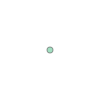

In [25]:
Point(deaths_gdf.loc[0,['lat', 'lon']])

In [27]:
deaths_gdf.deaths.max()

8.0

In [28]:
data_dir = '/cluster/tufts/hugheslab/datasets/NSF_OD/'
svi_dir = os.path.join(data_dir,'SocialVulnerabilityIndex')

result_dir = os.path.join(data_dir, 'results_20220606_update')
mass_shapefile = os.path.join(data_dir,'shapefiles','MA_2021')

In [29]:
matched_df = pd.read_csv(os.path.join(result_dir,'geocoded_deaths_2000_2020.csv')) 
matched_df['dod_dt'] = pd.to_datetime(matched_df['dod_dt'])
matched_df['month'] = matched_df['dod_dt'].dt.month

In [30]:
mass_gdf = gpd.read_file(mass_shapefile)
matched_df.loc[:,'tract'] = matched_df['tract'].astype(int)
mass_gdf.loc[:,'TRACTCE'] = mass_gdf['TRACTCE'].astype(int)

In [33]:
matched_df.groupby(['tract','block']).sum()

match   tigerlineid  statefp  countyfp         lat         lon  \
tract  block                                                                    
101    1000.0      1  8.572228e+07     25.0      25.0   42.362005  -71.132081   
       1002.0      1  8.569538e+07     25.0      25.0   42.362331  -71.134874   
       1003.0      2  1.713909e+08     50.0      50.0   84.721616 -142.262580   
       2001.0      1  8.569547e+07     25.0      25.0   42.360391  -71.128916   
102    1002.0      1  8.569532e+07     25.0      25.0   42.359438  -71.141080   
...              ...           ...      ...       ...         ...         ...   
985500 1012.0      2  1.285537e+09     50.0      10.0   83.233035 -142.058708   
       1013.0      3  1.353382e+09     75.0      15.0  124.868003 -213.052243   
985600 1004.0      1  4.677368e+07     25.0       5.0   42.078267  -71.105780   
       1016.0      2  9.361890e+07     50.0      10.0   84.136155 -142.209882   
       2006.0      1  4.680940e+07     25.0       5.0   42.087691  -71.079882   

               year  quarter  month  
tract  block                         
101    1000.0  2017        3      9  
       1002.0  2003        1      2  
       1003.0  4012        5     15  
       2001.0  2011        3      8  
102    1002.0  2008        3      9  
...             ...      ...    ...  
985500 1012.0  4020        6     16  
       1013.0  6045        8     21  
985600 1004.0  2005        4     11  
       1016.0  4037        6     15  
       2006.0  2003        2      5  

[15041 rows x 9 columns]

In [34]:
deaths_gdf

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,lat,lon,year,month,tract,deaths,geometry
0,25,017,333300,25017333300,3333,Census Tract 3333,G5020,S,1627185,436948,42.470764,-71.152055,2000,1,NaN,0.0,"POLYGON ((-71.16139 42.47071, -71.16136 42.471..."
1,25,017,333400,25017333400,3334,Census Tract 3334,G5020,S,4883574,62527,42.484548,-71.132032,2000,1,NaN,0.0,"POLYGON ((-71.14690 42.48077, -71.14673 42.480..."
2,25,017,333502,25017333502,3335.02,Census Tract 3335.02,G5020,S,1443446,0,42.485040,-71.146119,2000,1,NaN,0.0,"POLYGON ((-71.15960 42.48482, -71.15954 42.484..."
3,25,017,354500,25017354500,3545,Census Tract 3545,G5020,S,334459,0,42.384745,-71.125040,2000,1,NaN,0.0,"POLYGON ((-71.13077 42.38261, -71.13070 42.382..."
4,25,017,354700,25017354700,3547,Census Tract 3547,G5020,S,355374,0,42.389581,-71.122629,2000,1,NaN,0.0,"POLYGON ((-71.12901 42.39007, -71.12768 42.389..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427675,25,009,208302,25009208302,2083.02,Census Tract 2083.02,G5020,S,4199517,722531,42.485038,-71.004081,2021,12,NaN,0.0,"POLYGON ((-71.01723 42.48901, -71.01705 42.489..."
427676,25,009,212101,25009212101,2121.01,Census Tract 2121.01,G5020,S,20571367,575025,42.613694,-71.005231,2021,12,NaN,0.0,"POLYGON ((-71.05565 42.62288, -71.05509 42.625..."
427677,25,009,208401,25009208401,2084.01,Census Tract 2084.01,G5020,S,6530788,386401,42.487612,-71.030763,2021,12,208401.0,1.0,"POLYGON ((-71.04695 42.48796, -71.04672 42.488..."
427678,25,009,208402,25009208402,2084.02,Census Tract 2084.02,G5020,S,4410795,145126,42.466251,-71.035971,2021,12,NaN,0.0,"POLYGON ((-71.05389 42.47878, -71.05373 42.479..."
